In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [2]:
batch_size = 34
img_height = 180
img_width = 180

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  r"C:\Users\DEVANSH\OneDrive\Desktop\smoke train",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1347 files belonging to 2 classes.
Using 1078 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  r"C:\Users\DEVANSH\OneDrive\Desktop\smoke train",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1347 files belonging to 2 classes.
Using 269 files for validation.


In [5]:
class_names = ["no smoke","smoke"]

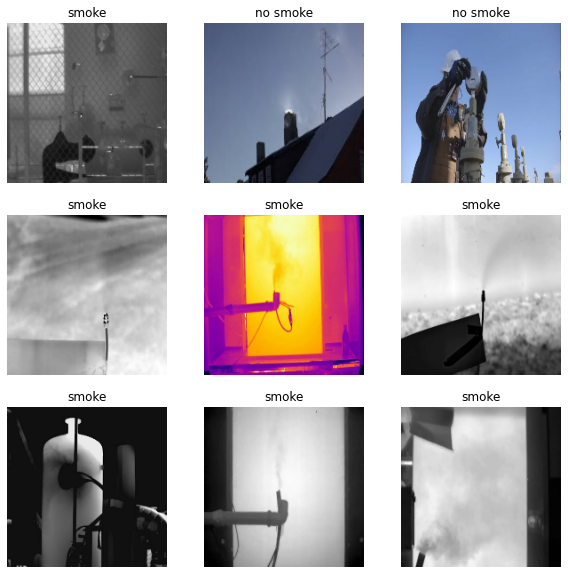

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(34, 180, 180, 3)
(34,)


In [8]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [9]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
import keras

model = keras.models.Sequential([
        keras.layers.Conv2D(64, 7, activation="relu", padding="same",
        input_shape=[180, 180, 3]),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(128, 3, activation="relu", padding="same"),  # (the number of repetitions is a hyperparameter you can tune).
        keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
        keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(512, 3, activation="relu", padding="same"),
        keras.layers.Conv2D(512, 3, activation="relu", padding="same"),
        keras.layers.MaxPooling2D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation="sigmoid")
    ])

In [12]:
opt = keras.optimizers.Adam(learning_rate=0.0006)

In [13]:
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(train_ds,validation_data=val_ds,epochs=30)

Epoch 1/30
32/32 [==============================] - 243s 8s/step - loss: 3.0105 - accuracy: 0.6206 - val_loss: 0.5670 - val_accuracy: 0.8587
Epoch 2/30
 1/32 [..............................] - ETA: 3:52 - loss: 0.6677 - accuracy: 0.6176